<a href="https://colab.research.google.com/github/AzulBarr/Aprendizaje-Automatico/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
Separación de datos
Contarán con una cantidad limitada de datos, por lo cual es importante tomar una buena decisión en el momento de empezar a utilizarlos.

Evaluar y justificar cómo separarán sus datos para desarrollo y para evaluación. ¿Qué consideraciones tuvieron en cuenta para realizar esta división?

Importante: en este punto no está permitido dividir la base de datos utilizando la función train_test_split de sklearn. Deben decidir e implementar la separación.

In [3]:
# Librerias
import pandas as pd
import numpy as np
import sklearn as sk

In [51]:
def train_test_split(df: pd.DataFrame, proporcion_test: float, target: str = "target", random_state: int = 7 ) -> tuple:
  cantidad_true = len(df[df[target]==True])
  cantidad_false = len(df) - cantidad_true

  df_true = df[df[target]==True]
  df_false = df[df[target]==False]

  df_test_true = df_true.sample(n=round(proporcion_test * cantidad_true), random_state=random_state)
  df_test_false = df_false.sample(n=round(proporcion_test * cantidad_false), random_state=random_state)

  df_test = pd.concat([df_test_true, df_test_false])
  df_train = df.drop(df_test.index)

  X_train = df_train.drop(target, axis=1)
  y_train = df_train[target]
  X_test = df_test.drop(target, axis=1)
  y_test = df_test[target]

  return X_train, X_test, y_train, y_test

In [53]:
datos = pd.read_csv("data.csv")
X_train, X_test, y_train, y_test = train_test_split(datos, 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 200)
(400,)
(100, 200)
(100,)


In [32]:
X_train.head()

,uAro,vIlg,VtZP,qTUs,bgVs,PdRG,CqGH,bfBD,ZtLG,SNCN,...,fufA,hnYp,cWwQ,GkqC,VHPu,KKxk,TNkz,GkcC,KSYM,YpTu
0,1.284843,0.676813,-0.445511,-0.025185,-4.546595,0.370719,0.104766,-0.365206,1.155584,0.791519,...,-0.414033,2.052021,-0.256875,-0.961930,4.731984,21.095664,-0.738587,0.728201,1.346252,0.659334
1,-0.027713,1.020162,-1.665049,-1.052946,3.144244,2.104813,0.603191,0.180639,1.458030,-0.014031,...,-0.160556,0.891111,-1.328636,-0.848692,-3.989681,7.741832,-0.768312,0.160028,-1.028335,-1.733235
2,-0.160656,-1.011420,-0.216399,0.797341,5.672563,7.822798,0.806452,0.386419,-0.854304,0.003736,...,-0.367915,1.411142,2.481312,0.492739,-3.132938,-22.681919,-1.066736,-0.041351,-0.311166,-1.299748
3,1.128357,0.341273,-1.669474,0.767591,-4.610520,-8.788584,2.272761,-0.762237,-0.245964,-0.101648,...,0.967403,1.418474,-0.555290,-0.400534,0.149306,-8.262423,-4.142330,1.256389,-1.252168,-1.597531
6,-0.557834,-0.937319,-0.648424,-0.331217,-3.087285,-2.405165,-0.729081,0.569683,1.512115,-0.017688,...,0.305201,0.595378,-0.932116,-0.723574,-1.136253,-8.650371,0.178844,0.107175,-1.074904,0.918250


In [49]:
 X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(datos.drop("target", axis=1), datos["target"], stratify=datos["target"], test_size=0.2, random_state=7)

In [54]:
df = y_train
cantidad_true = len(df[df==True])
cantidad_false = len(df) - cantidad_true
print(cantidad_true)
print(cantidad_false)

118
282


## Ejercicio 2


### Construcción de modelos

Para este punto, la tarea consiste en construir y evaluar modelos de tipo **árbol de decisión**. Además, obtener una **estimación realista de la performance** de los mismos.

1. Entrenar un árbol de decisión con altura máxima 3 y el resto de los hiperparámetros en default.

1. Estimar la performance del modelo utilizando _K-fold cross validation_ con `K=5`, con las métricas _Accuracy_, _Area Under the Precision-Recall Curve (AUPRC)_, y _Area Under the Receiver Operating Characteristic Curve (AUCROC)_.

   En esta oportunidad se va a pedir además de calcular las métricas para cada fold por separado y su promedio, que hagan el cálculo del score global (como vimos en clase), sólo para los folds de validación.
   
   Reportar el resultado en una tabla similar a:

      <table>
      <thead>
      <tr>
      <th align="center">Permutación</th>
      <th>Accuracy (training)</th>
      <th>Accuracy (validación)</th>
      <th>AUPRC (training)</th>
      <th>AUPRC (validación)</th>
      <th>AUC ROC (training)</th>
      <th>AUC ROC (validación)</th>
      </tr>
      </thead>
      <tbody>
      <tr>
      <td align="center">1</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">2</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">3</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">4</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">5</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <tr>
      <td align="center">Promedios</td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      <td></td>
      </tr>
      <td align="center">Global</td>
      <td>(NO) </td>
      <td></td>
      <td>(NO) </td>
      <td></td>
      <td>(NO) </td>
      <td></td>
      </tr>
      </tbody>
      </table>    
  
   **Importante**: de acá en más sólamente utilizaremos el score promedio cuando hagamos _K-fold cross-validation_.

1. Explorar las siguientes combinaciones de parámetros para  árboles de decisión (siguiendo con $k-fold$ con $k=5$) utilizando [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html) de _scikit learn_. No está permitido utilizar `GridSearchCV` en este ejercicio.

   <table>
   <thead>
   <tr>
   <th align="center">Altura máxima</th>
   <th align="center">Criterio de corte</th>
   <th>Accuracy (training)</th>
   <th>Accuracy (validación)</th>
   </tr>
   </thead>
   <tbody><tr>
   <td align="center">3</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Gini</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">3</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">5</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   <tr>
   <td align="center">Infinito</td>
   <td align="center">Entropía</td>
   <td></td>
   <td></td>
   </tr>
   </tbody></table>

1. ¿Qué conclusiones se pueden sacar de estas tablas?  

In [60]:
# !pip3 install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from six import StringIO  #pip3 install six
##### from sklearn.externals.six import StringIO  # opción para versiones más viejas de sklearn
from IPython.display import Image, display
import pydotplus


def dibujar_arbol(clf, c_name, f_name):
    #
    # modo de uso: dibujar_arbol(arbol)
    #
    dot_data = StringIO()
    sk.tree.export_graphviz(clf, out_file = dot_data,
                    filled = True,
                    class_names = c_name,
                    feature_names = f_name,
                    special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

In [98]:
arbol = sk.tree.DecisionTreeClassifier(max_depth=3)
arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

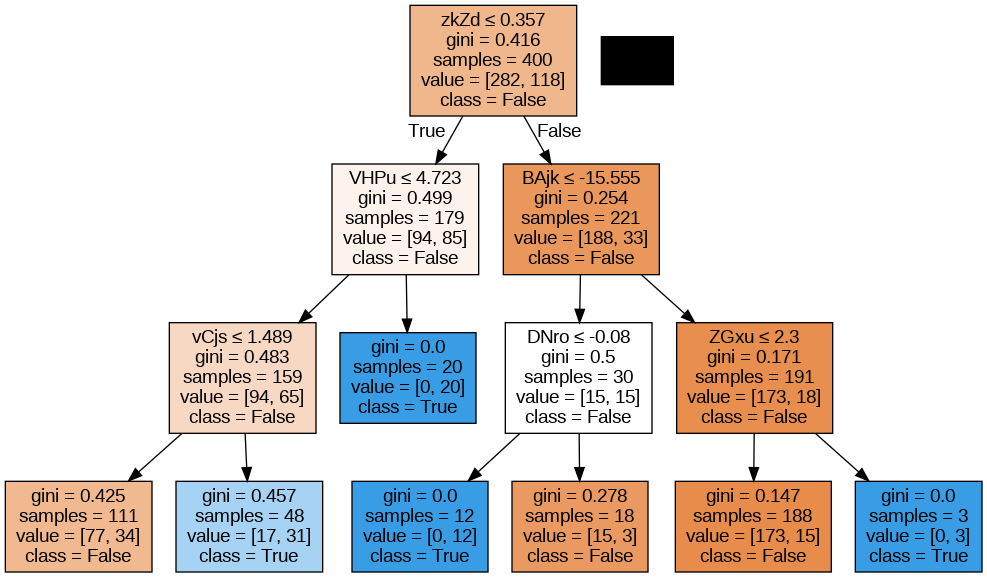

In [99]:
dibujar_arbol(arbol, c_name = ["False", "True"], f_name= X_train.columns.tolist())

In [100]:
print(f"Accuracy sobre el train set: {arbol.score(X_train, y_train):.2f}")
print(f"Accuracy sobre el test set: {arbol.score(X_test, y_test):.2f}")

Accuracy sobre el train set: 0.83
Accuracy sobre el test set: 0.75
